# **Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D, SpatialDropout2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers


# **DataSet upload and processing**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


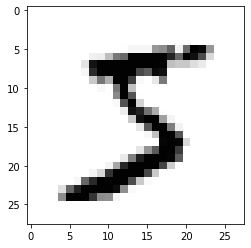

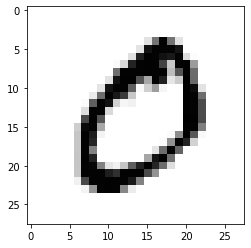

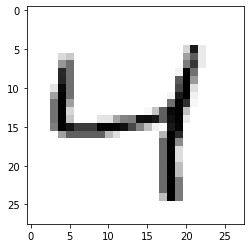

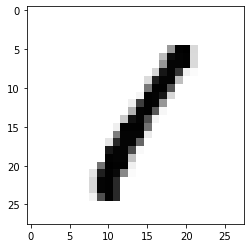

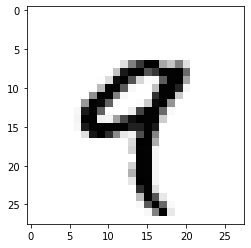

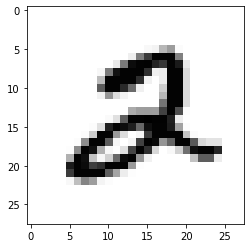

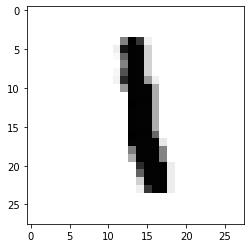

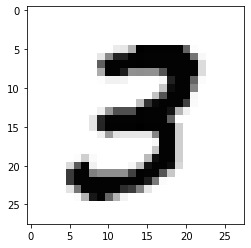

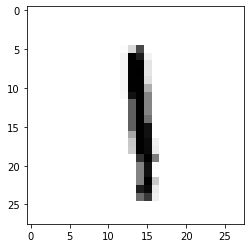

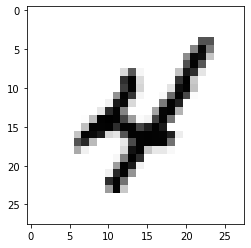

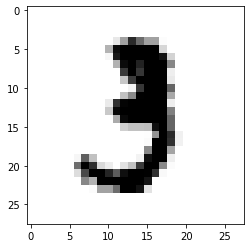

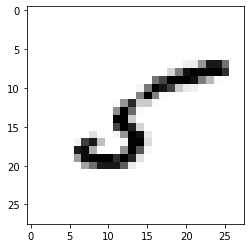

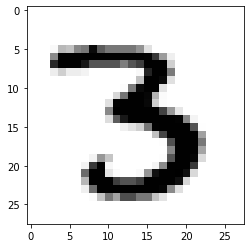

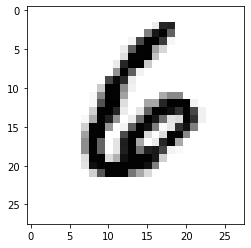

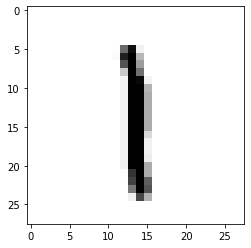

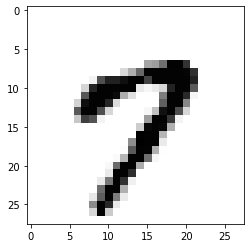

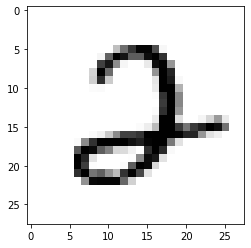

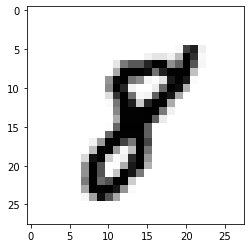

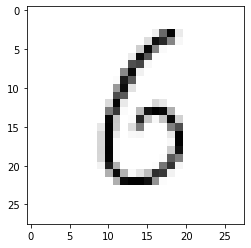

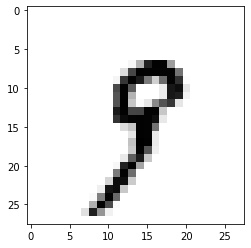

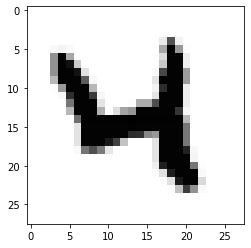

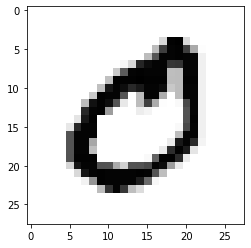

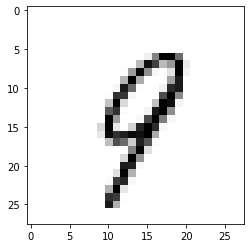

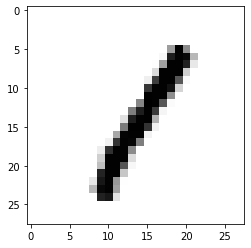

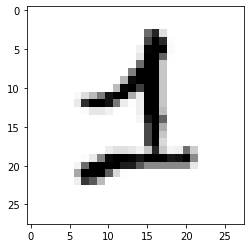

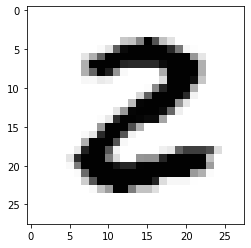

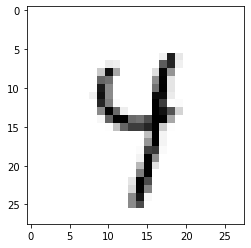

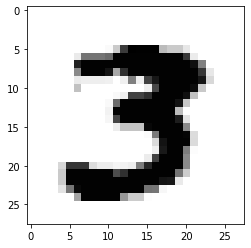

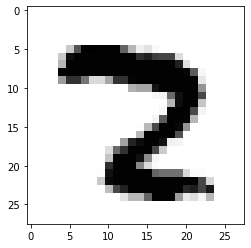

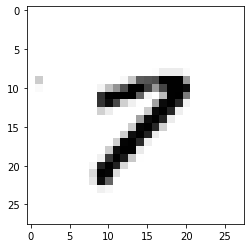

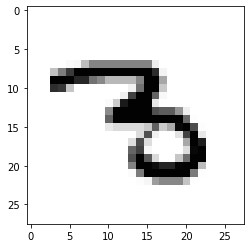

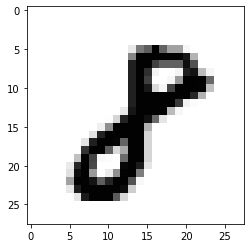

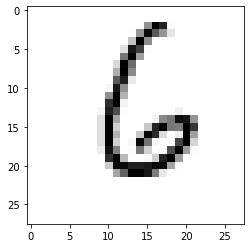

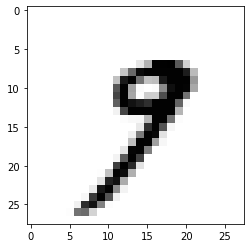

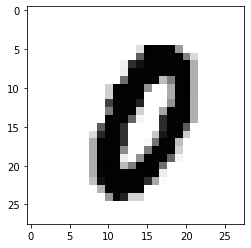

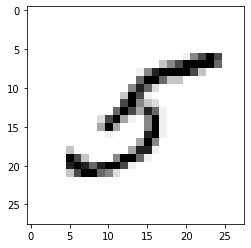

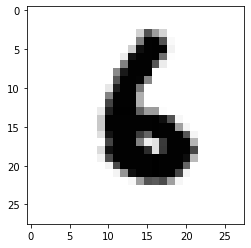

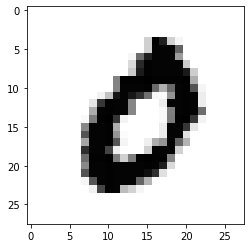

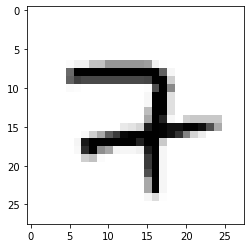

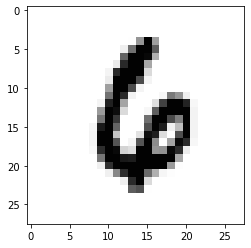

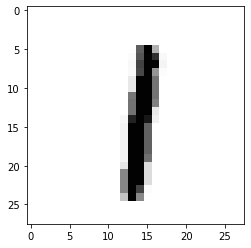

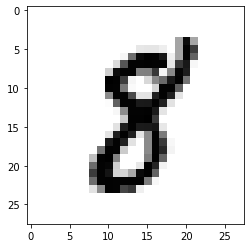

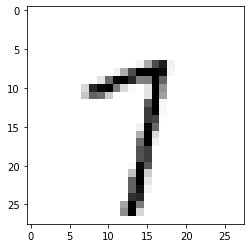

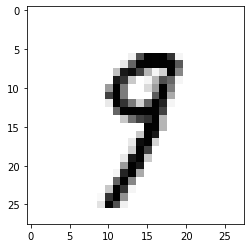

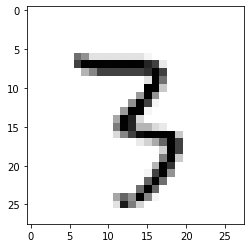

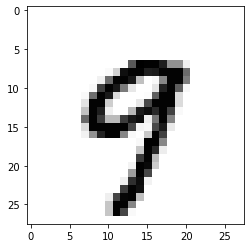

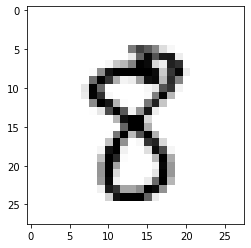

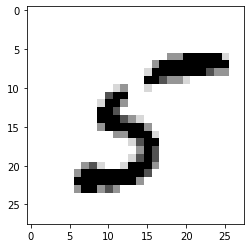

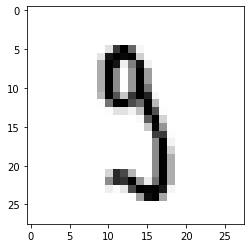

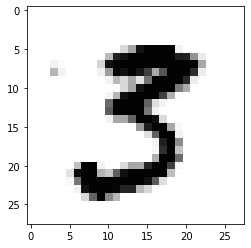

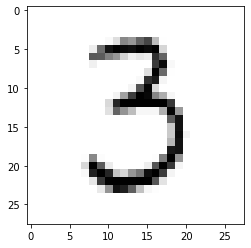

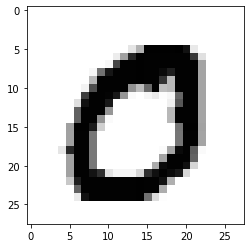

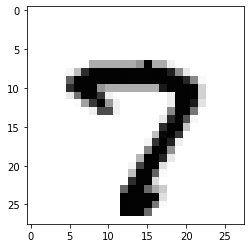

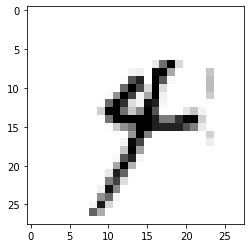

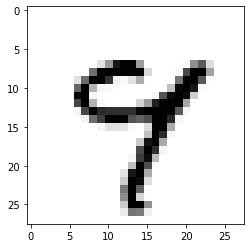

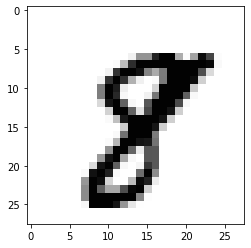

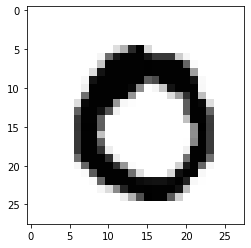

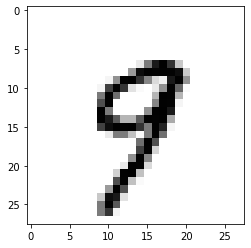

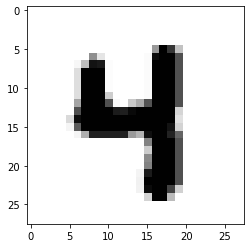

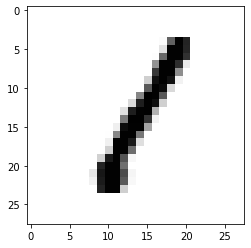

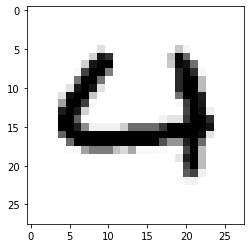

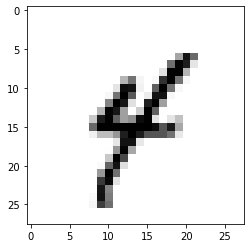

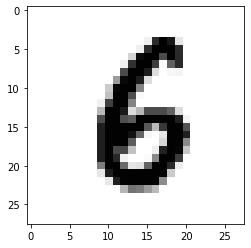

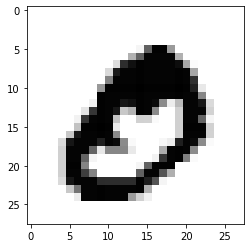

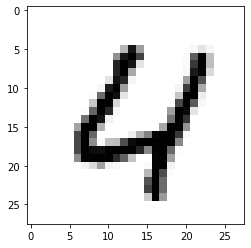

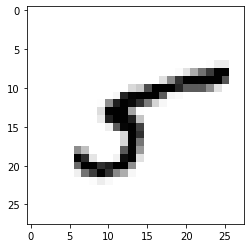

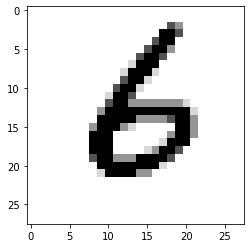

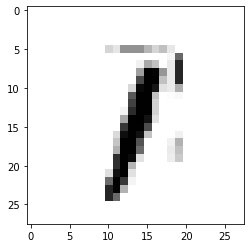

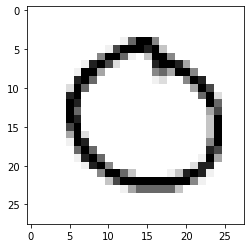

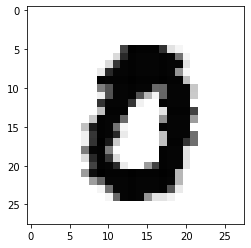

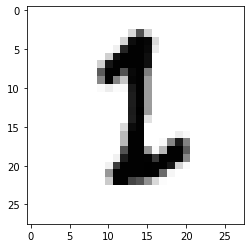

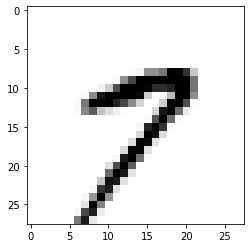

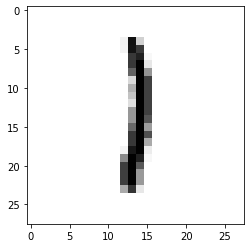

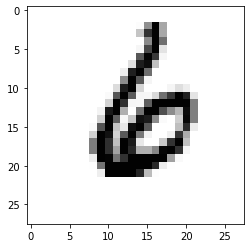

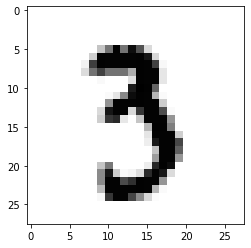

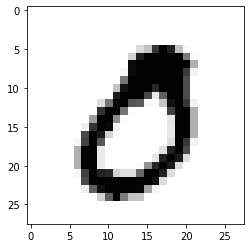

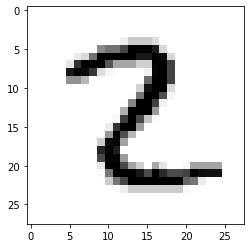

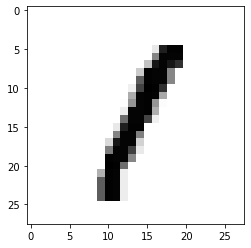

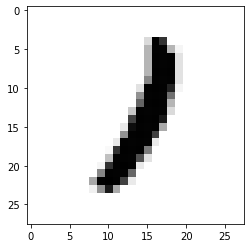

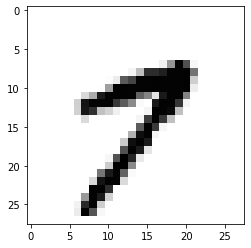

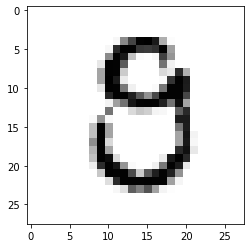

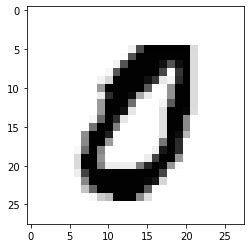

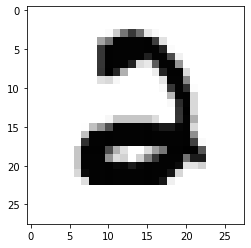

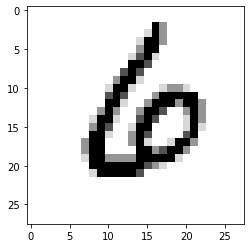

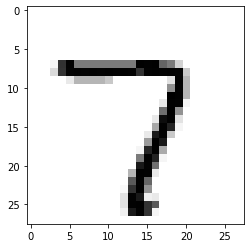

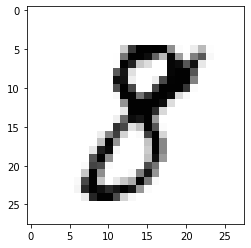

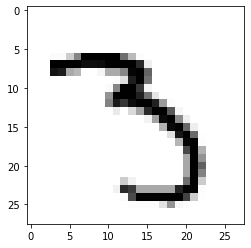

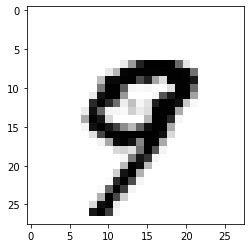

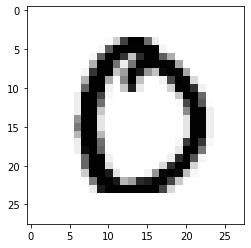

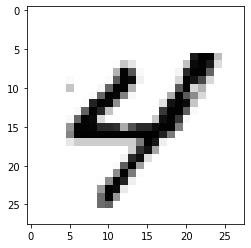

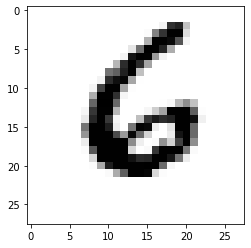

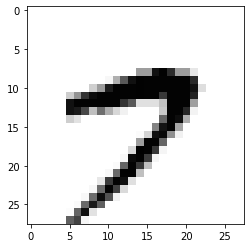

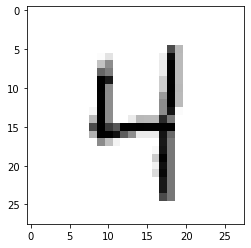

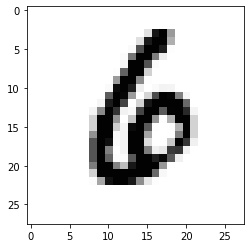

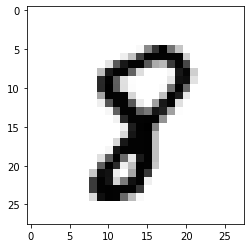

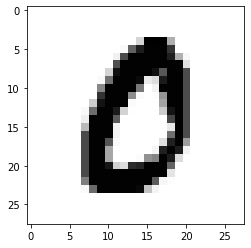

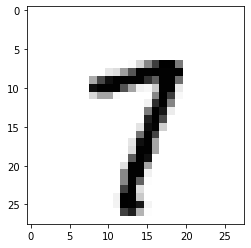

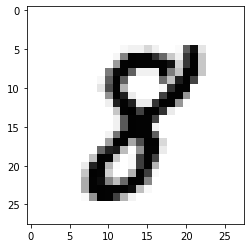

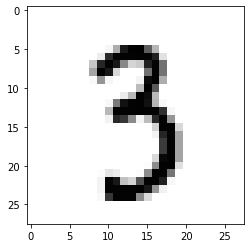

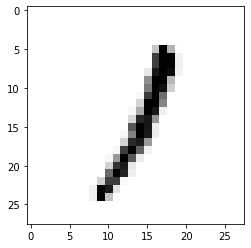

In [ ]:
for i in range(100):
    img = x_train[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000,)


In [ ]:
print(x_test.shape,y_test.shape)

(10000, 28, 28, 1) (10000,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **CNN Mode**


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
adam = optimizers.Adam(lr = 0.001)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint('minst_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size= 64,
                    callbacks=[checkpointer],
                    epochs =50, 
                    verbose = 1,
                    shuffle=True,
                    validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - ETA: 0s - loss: 2.2870 - accuracy: 0.1302
Epoch 00001: val_loss improved from inf to 2.25453, saving model to minst_model.hdf5
938/938 [==============================] - 167s 178ms/step - loss: 2.2870 - accuracy: 0.1302 - val_loss: 2.2545 - val_accuracy: 0.2841
Epoch 2/50
938/938 [==============================] - ETA: 0s - loss: 2.2463 - accuracy: 0.1984
Epoch 00002: val_loss improved from 2.25453 to 2.19341, saving model to minst_model.hdf5
938/938 [==============================] - 167s 178ms/step - loss: 2.2463 - accuracy: 0.1984 - val_loss: 2.1934 - val_accuracy: 0.5734
Epoch 3/50
938/938 [==============================] - ETA: 0s - loss: 2.1871 - accuracy: 0.2764
Epoch 00003: val_loss improved from 2.19341 to 2.09979, saving model to minst_model.hdf5
938/938 [==============================] - 166s 177ms/step - loss: 2.1871 - accuracy: 0.2764 - val_loss: 2.0998 - val_accuracy: 0.6513
Epoch 4/50
938/938 [========================

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2542194426059723
Test accuracy: 0.9241999983787537


In [ ]:
!cp /content/minst_model.hdf5 /content/drive/My\ Drive